# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


In [5]:
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


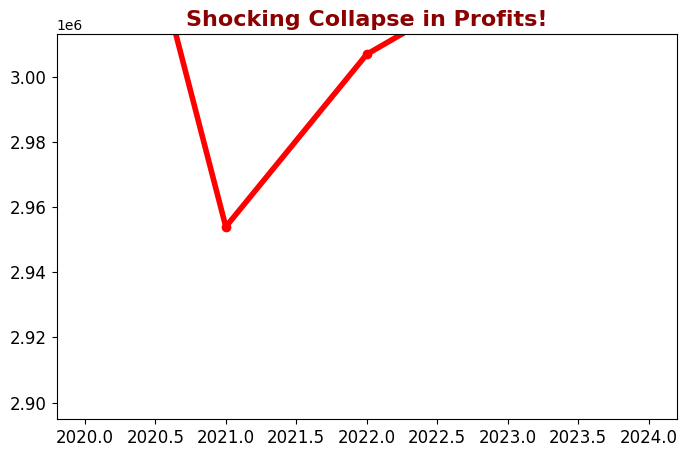

In [6]:
#Original Bad Chart
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Write your notes about bad chart #1 here:
- The y axis scale is poor, truncating most of the data to give a confusing and misleading impression.
- The title indicates poor performance when the trend overall is favorable.
- The axes should be labeled, and years shown without decimals.

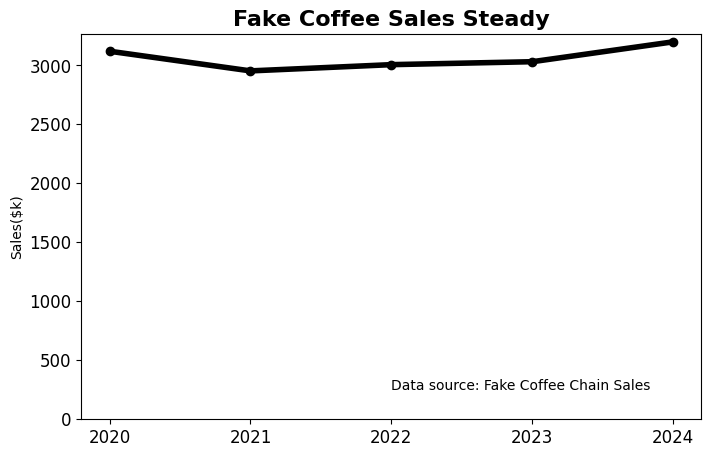

In [7]:
#Improved Bad Chart #1
coffee_df['Year'] = coffee_df['Year'].astype(str)
coffee_df['Sales_k'] = coffee_df['Sales']/1000

plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales_k"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales_k"], color="black", linewidth=4, marker="o")
plt.ylim(0, subset["Sales_k"].max() * 1.02)  # extreme truncation
plt.title("Fake Coffee Sales Steady", fontsize=16, fontweight="bold", color="black")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Sales($k)")
plt.text(2,250, 'Data source: Fake Coffee Chain Sales', fontsize=10)
plt.show()



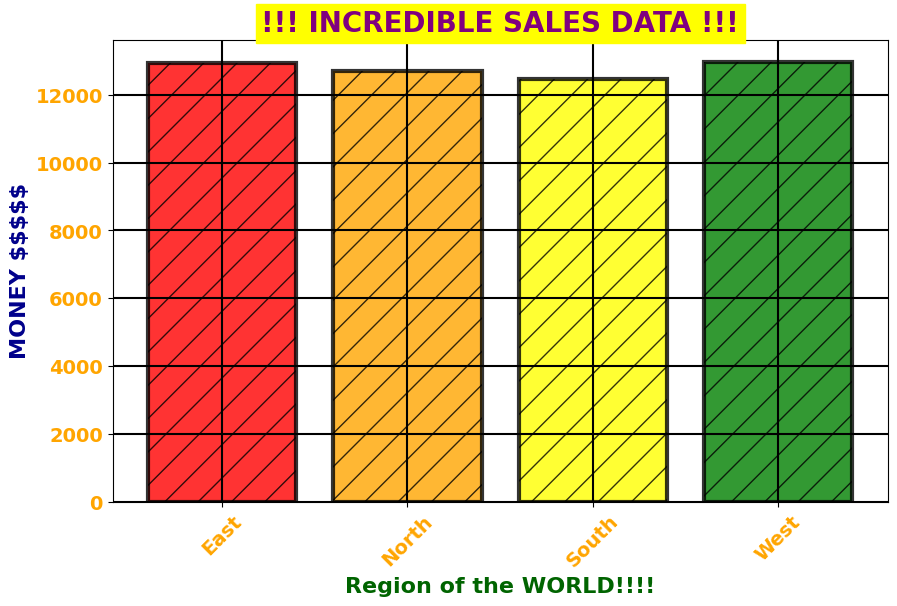

In [9]:
#original bad chart #2
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()

### Write your notes about bad chart #2 here:
- Coloring and shading of bars is extraneous
- Unclear punctutation on labels
- Scale on y-axis should be zoomed in to highlight variances in data instead of similarity
- Poor title that characterizes sales data as "incredible" without context of changes over time
- Changed to pie chart to highlight share of total sales per region

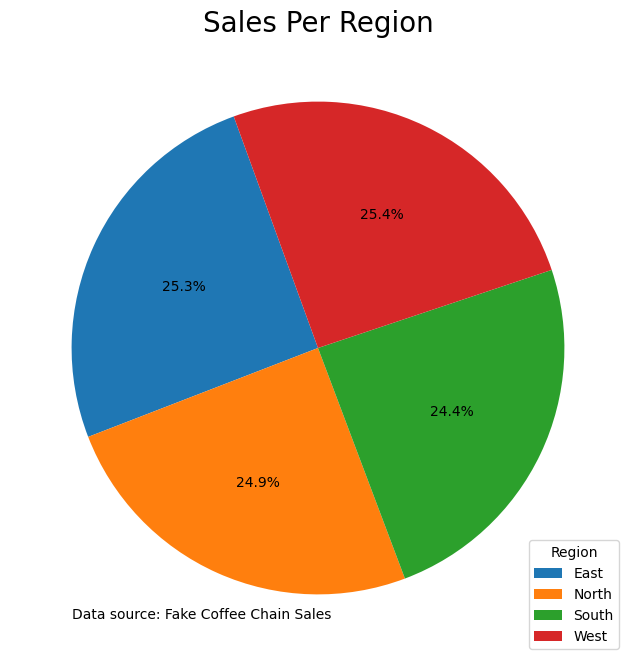

In [10]:
#improved bad chart #2
avg_sales = coffee_df.groupby("Region")["Sales"].mean()

plt.figure(figsize=(8,8))
plt.tight_layout()
plt.pie(
    avg_sales,
    labels=None,
    startangle=110,
    #colors=colors,
    autopct="%1.1f%%"
    )
plt.title("Sales Per Region", fontsize=20, color="black")
plt.legend(
    labels = avg_sales.index,
    loc="lower right",
    title = "Region"
)
plt.text(-1,-1.1, 'Data source: Fake Coffee Chain Sales', fontsize=10)
plt.show()


## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


In [11]:
coffee_df['Year'] = coffee_df['Year'].astype(str)
coffee_df.groupby('Year').describe()
coffee_df['Overhead'] = coffee_df['Sales']-coffee_df['Profit']
coffee_df['Overhead_Rate'] = coffee_df['Overhead']/coffee_df['Sales'].round(0)*100
coffee_df.head()


,Year,Month,Region,Category,Sales,Profit,Sales_k,Overhead,Overhead_Rate
0,2020,January,East,Espresso,14724,5290.46,14.724,9433.54,64.069139
1,2020,January,East,Lattes,11948,4138.77,11.948,7809.23,65.360144
2,2020,January,East,Tea,18660,5959.44,18.660,12700.56,68.063023
3,2020,January,East,Pastries,11265,2604.46,11.265,8660.54,76.880071
4,2020,January,East,Beans,8954,2613.22,8.954,6340.78,70.815055


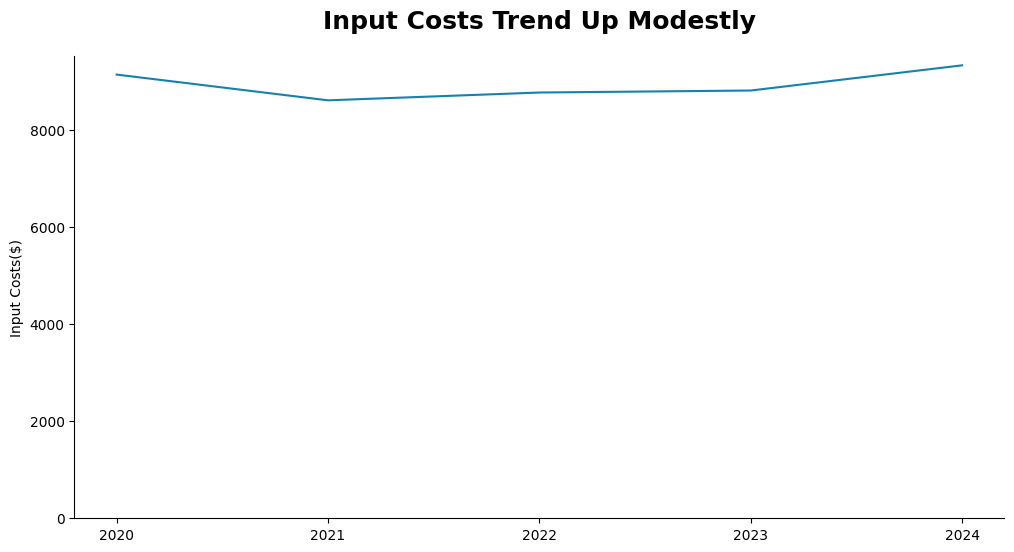

In [13]:
overhead_yearly_avg = coffee_df.groupby("Year")["Overhead"].mean().round(2)
overhead_rate_yearly_avg = coffee_df.groupby("Year")["Overhead_Rate"].mean().round(2)
plt.figure(figsize=(12,6))
plt.plot(
    overhead_yearly_avg.index,
    overhead_yearly_avg.values, 
    label = 'Input Costs',
    color = "#1481B3",
    )

plt.ylim(0, overhead_yearly_avg.max() * 1.02)
plt.ylabel("Input Costs($)")
plt.title("Input Costs Trend Up Modestly", fontsize = 18, fontweight="bold", pad = 20)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

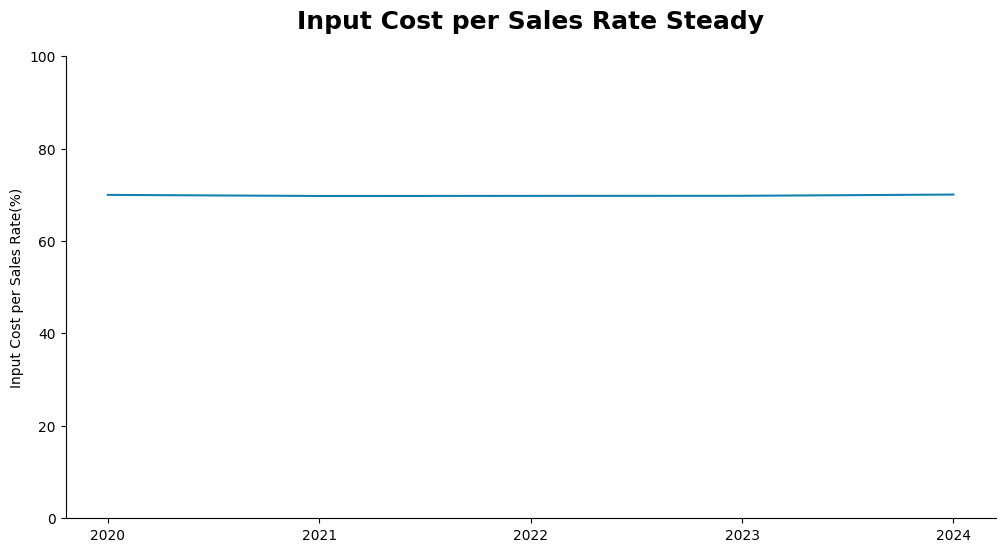

In [ ]:
overhead_yearly_avg = coffee_df.groupby("Year")["Overhead"].mean().round(2)
overhead_rate_yearly_avg = coffee_df.groupby("Year")["Overhead_Rate"].mean().round(2)
plt.figure(figsize=(12,6))
plt.plot(
    overhead_rate_yearly_avg.index,
    overhead_rate_yearly_avg.values, 
    color = "#1481B3",
    )

plt.ylabel("Input Cost per Sales Rate(%)")
plt.ylim(0,100)
plt.title("Input Cost per Sales Rate Steady", fontsize = 18, fontweight="bold", pad = 20)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()